In [27]:
'''
Classification: Decision Tree
Dataset: madfhantr.csv
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. 
Customer first applies for a home loan and after that the company validates the customer eligibility for the loan. 
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
application forms. 
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 
To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amount so 
that they can specifically target these customers.
'''

'\nClassification: Decision Tree\nDataset: madfhantr.csv\nDream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. \nCustomer first applies for a home loan and after that the company validates the customer eligibility for the loan. \nCompany wants to automate the loan eligibility process (real time) based on customer detail provided while filling online \napplication forms. \nThese details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. \nTo automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amount so \nthat they can specifically target these customers.\n'

In [46]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [29]:
# reading dataset
data = pd.read_csv(r'LP-1_Dataset\Decision Tree & Naive Bayes Classification\madfhantr.csv')

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
# dropping unnecessary columns
data = data.drop(columns=['Loan_ID'])

In [31]:
# checking for null values in dataset
null_counts = data.isnull().sum()
print(null_counts)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [32]:
print(data.isnull().any())

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool


In [33]:
print(data[data.isnull().any(axis=1)])

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
11     Male     Yes          2      Graduate           NaN             2500   
16     Male      No          1  Not Graduate            No             3596   
19     Male     Yes          0      Graduate           NaN             2600   
23      NaN     Yes          2  Not Graduate            No             3365   
..      ...     ...        ...           ...           ...              ...   
592     NaN      No         3+      Graduate           Yes             9357   
597    Male      No        NaN      Graduate            No             2987   
600  Female      No         3+      Graduate           NaN              416   
601    Male     Yes          0  Not Graduate           NaN             2894   
605    Male     Yes          0  Not Graduate            No             2400   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [34]:
# filling missing values

# for categorical columns
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

# for numerical columns
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].median(), inplace=True)

In [35]:
# convert '3+' to 3
data['Dependents'].replace('3+', 3, inplace=True)

In [36]:
# convert categorical columns into numerical format
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [37]:
# after data preprocessing
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,Y,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,1


In [38]:
# separate the dataset into features (X) and the target (Y)
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status'].map({'Y': 1, 'N': 0}) # encode target variable

In [39]:
# split the data to train and test the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# initialize and train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
# predictions
y_pred = clf.predict(X_test)

# model evaluation
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.7243243243243244
Confusion Matrix:
 [[ 33  32]
 [ 19 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.51      0.56        65
           1       0.76      0.84      0.80       120

    accuracy                           0.72       185
   macro avg       0.70      0.67      0.68       185
weighted avg       0.72      0.72      0.72       185



In [44]:
# Tune the decision tree

# Tune max_depth

clf_tuned = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_tuned.fit(X_train, y_train)
y_pred_tuned = clf_tuned.predict(X_test)

# evaluate the tuned model
print("Tuned Accuracy: ", accuracy_score(y_test, y_pred_tuned))

Tuned Accuracy:  0.7567567567567568


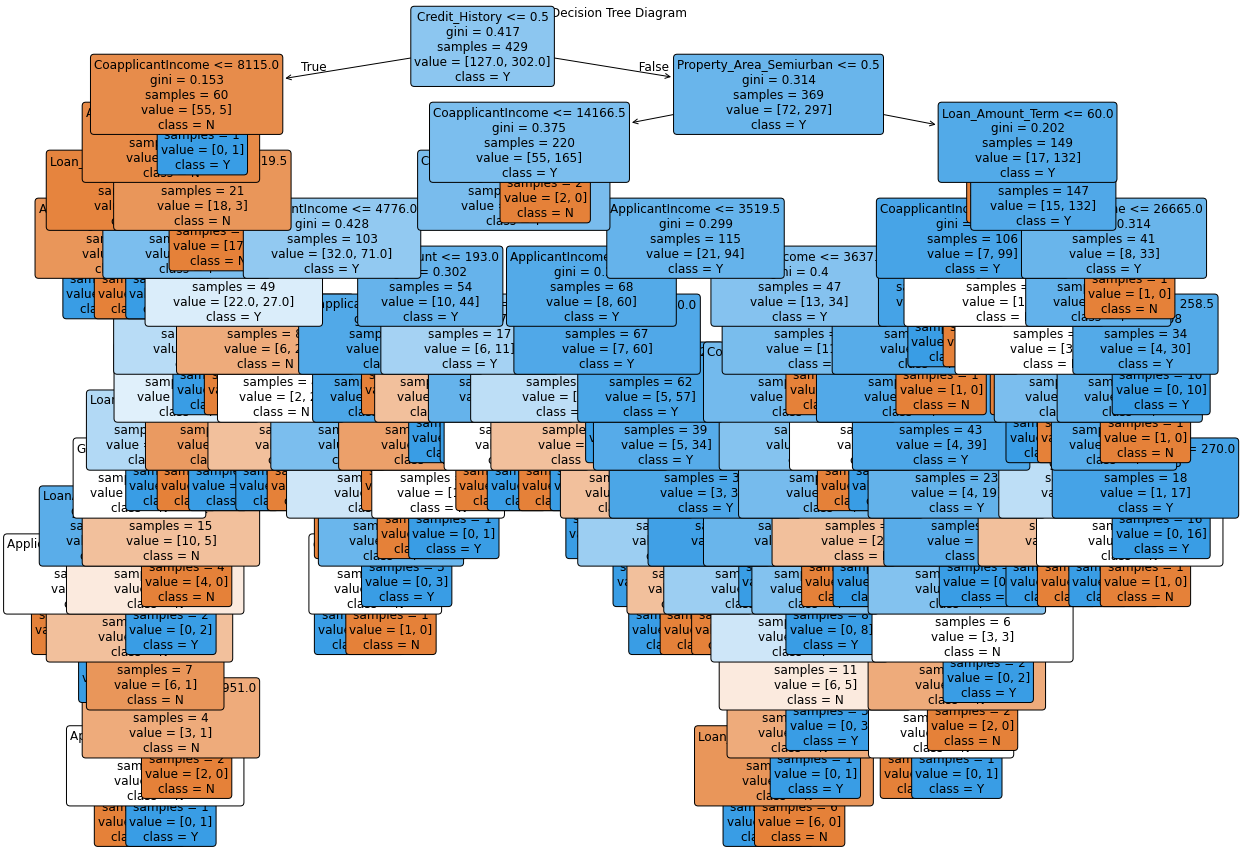

In [57]:
plt.figure(figsize=(20, 15))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['N', 'Y'], rounded=True, fontsize=12)
plt.title("Decision Tree Diagram")
plt.show()